## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95,0.9,0.85,0.8]

In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mm in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MM = %.6f" % (mm))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mm)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-mm-%s" % str(mm)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with MM = 0.950000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==========

50000/50000 [==============================] - 7s 140us/step - loss: 0.8930 - accuracy: 0.6856 - val_loss: 1.4565 - val_accuracy: 0.5200
Epoch 48/50
50000/50000 [==============================] - 8s 150us/step - loss: 0.8795 - accuracy: 0.6909 - val_loss: 1.4069 - val_accuracy: 0.5281
Epoch 49/50
50000/50000 [==============================] - 7s 148us/step - loss: 0.8738 - accuracy: 0.6916 - val_loss: 1.4370 - val_accuracy: 0.5120
Epoch 50/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.8568 - accuracy: 0.6971 - val_loss: 1.3984 - val_accuracy: 0.5217
Experiment with MM = 0.900000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_______________________________________

Epoch 45/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.1722 - accuracy: 0.5889 - val_loss: 1.3491 - val_accuracy: 0.5228
Epoch 46/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.1625 - accuracy: 0.5930 - val_loss: 1.3714 - val_accuracy: 0.5192
Epoch 47/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.1569 - accuracy: 0.5938 - val_loss: 1.3854 - val_accuracy: 0.5106
Epoch 48/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.1488 - accuracy: 0.5959 - val_loss: 1.3231 - val_accuracy: 0.5279
Epoch 49/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.1375 - accuracy: 0.6020 - val_loss: 1.3361 - val_accuracy: 0.5280
Epoch 50/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.1306 - accuracy: 0.6028 - val_loss: 1.3390 - val_accuracy: 0.5278
Experiment with MM = 0.850000
Model: "model_1"
___________________________________________________________

Epoch 43/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.3178 - accuracy: 0.5387 - val_loss: 1.4025 - val_accuracy: 0.5003
Epoch 44/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.3111 - accuracy: 0.5408 - val_loss: 1.4063 - val_accuracy: 0.4980
Epoch 45/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.3045 - accuracy: 0.5451 - val_loss: 1.3910 - val_accuracy: 0.5046
Epoch 46/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.2964 - accuracy: 0.5455 - val_loss: 1.4180 - val_accuracy: 0.4929
Epoch 47/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.2920 - accuracy: 0.5484 - val_loss: 1.3899 - val_accuracy: 0.5068
Epoch 48/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.2830 - accuracy: 0.5512 - val_loss: 1.3875 - val_accuracy: 0.5074
Epoch 49/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.2773 - accuracy: 0.5547

Epoch 41/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.4082 - accuracy: 0.5065 - val_loss: 1.4684 - val_accuracy: 0.4819
Epoch 42/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.4016 - accuracy: 0.5079 - val_loss: 1.4756 - val_accuracy: 0.4710
Epoch 43/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.3960 - accuracy: 0.5096 - val_loss: 1.4524 - val_accuracy: 0.4841
Epoch 44/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.3889 - accuracy: 0.5134 - val_loss: 1.4508 - val_accuracy: 0.4869
Epoch 45/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.3833 - accuracy: 0.5146 - val_loss: 1.4507 - val_accuracy: 0.4812
Epoch 46/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.3769 - accuracy: 0.5173 - val_loss: 1.4399 - val_accuracy: 0.4861
Epoch 47/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.3707 - accuracy: 0.5193

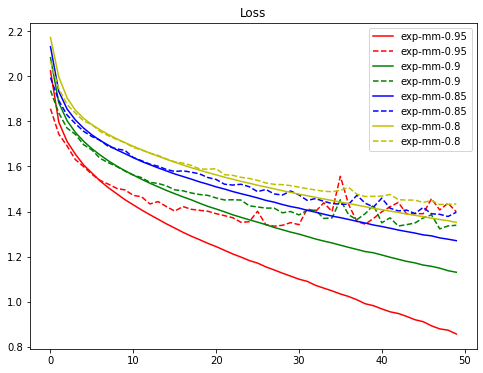

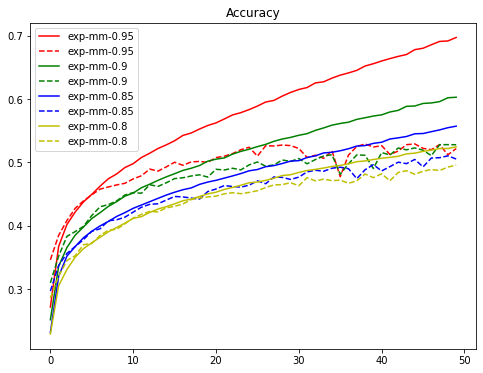

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()